# Lecture 5, Data science in Neuroscience


## Plan for today

1. Review key machine learning concepts
2. Review of last week's exercise: Using a machine learning approach to find the best parameters for a head-direction cell.
3. Introduction to deep neuronal networks
4. Pose estimation using Deeplabcut

***


# Machine learning briefly

* This gives computer the ability to learn without being explicitely programmed (Arthur Samuel, 1959).

## Types

* Prediction versus inference
* Supervised versus unsupervised
* Regression versus classification

These concepts are useful to quickly find the right tool (model) for the job.

## How do computers learn?

Often using an iterative process (i.e. a loop).

1. Feed data to your model
2. Calculate the error (loss).
3. Adjust the model parameters by a small amount to minimize the loss, using gradients.
4. Go back to 1 until the gradients are near 0.


## Our linear regression model

* One of the simplest models.
* $Y = wX + b$
* $Y$: target
* $X$: features (inputs)
* $w$ is the slope and $b$ is the intercept.
* We found the best parameters ($w$ and $b$) that minimize a loss function.



***

## Back to our exercise at the end o Lecture 4

Can you find the best parameters to explain the firing rate of a head direction cell?


*** 
## Deep neural networks

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>




## Artificial neuron

A **neuron** is the building block of the neural network.


They do 3 things: 
* A linear transofrmation of the inputs
* Adding a constant 
* Applying a fixed nonlinear function (activation fucntion)
    
The input can be a single value or a vector. The output can be a single value or a vector.

Artificial neurons are not too complicated. We can easily code one to understand how they work.

In [1]:
def printInputWeightBias(inputData,w,b):
    """
    Function to print the shape and data in inputData, weights and biases
    """
    print("************")
    print("inputData.shape:",inputData.shape)
    print("inputData:",inputData)
    print("************")
    print("weights.shape:", w.shape)
    print("weights:",w)
    print("************")
    print("bias.shape", b.shape)
    print("bias:",b)

We prepare some input data, weights (w) and bias (b).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

inputSize=15
inputData = np.linspace(-1,1,inputSize).reshape(-1,inputSize) # 1D array as input
w = np.random.random(inputSize).reshape(inputSize,-1)-0.5 # numbers weights between -0.5 and 0.5, 1D array matching the size of input
b = np.random.random(1) # a bias term 

printInputWeightBias(inputData,w,b)

************
inputData.shape: (1, 15)
inputData: [[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]]
************
weights.shape: (15, 1)
weights: [[ 0.26535208]
 [ 0.28919833]
 [-0.05897398]
 [-0.00632948]
 [-0.11905716]
 [ 0.25547774]
 [-0.23994615]
 [ 0.48673328]
 [ 0.41926392]
 [-0.30670968]
 [ 0.22970875]
 [-0.40350481]
 [-0.29645525]
 [-0.38741412]
 [-0.44955527]]
************
bias.shape (1,)
bias: [0.510774]


We can write a simple function to represent the calculation of a neuron. The formula is very similar to a regression model, with the addition of a non-linear function.

In [3]:
def neuron_function(inputData,w,b):
    """
    Operation performed by a single neuron
    
    inputData@w is the dot product of 2 matrices.
    """
    return np.tanh(inputData@w + b)

In [4]:
neuron_function(inputData,w,b) 

array([[-0.799655]])

The main role of the np.tanh function is to add some non-linearity in the network. Instead of having a straight line, we get a s-shaped curve.

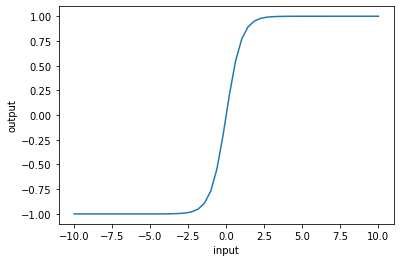

In [5]:
inputs = np.linspace(-10,10)
plt.plot(inputs,np.tanh(inputs))
plt.xlabel("input")
plt.ylabel("output")
plt.show()

A neuron is just  a linear function (like our linear regression model) within a non-linear function (here tanh). The tanh function limits the output from -1 to 1 and adds non-linearity to our model.

See [hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions)

See [relu function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))

## A layer of neurons

A layer is just a group of neurons. 

Each neuron in a layer has its own set of weights and its own bias.

The neurons of the layer often have the same inputs, but different weights.

To code for a layer instead of a single neuron
* the 1D weight vector becomes a 2D weight array, one column per neuron
* We get one bias term per neuron

In [6]:
import numpy as np
import matplotlib.pyplot as plt

inputSize=15
nNeurons = 4
inputData = np.linspace(-1,1,inputSize).reshape(-1,inputSize) # 2D array as input
w = np.random.random(inputSize*nNeurons).reshape(inputSize,nNeurons)-0.5 # numbers weights between -0.5 and 0.5, 2D array matching
b = np.ones(nNeurons) # bias terms, one per neuron

printInputWeightBias(inputData,w,b)

************
inputData.shape: (1, 15)
inputData: [[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]]
************
weights.shape: (15, 4)
weights: [[-0.11811761 -0.38353495 -0.08457917  0.08341081]
 [-0.43382017  0.0767557  -0.19239219 -0.30862975]
 [ 0.09444411  0.09310522 -0.28945619  0.14487115]
 [-0.2969779  -0.13741122  0.47473021 -0.40367754]
 [ 0.10170151 -0.05588464 -0.35817307 -0.02775847]
 [ 0.14006814  0.23001738  0.33647336 -0.34439344]
 [-0.44897574 -0.24109715  0.21164353  0.0127347 ]
 [ 0.23419921  0.07986056  0.10652311  0.16417079]
 [-0.01556977  0.12272424  0.34636548  0.30229926]
 [-0.36869062 -0.26857063 -0.4652841  -0.05877852]
 [-0.26288242  0.25404435  0.29463678  0.32394033]
 [-0.19798855 -0.46045241 -0.12048272  0.10842069]
 [ 0.14243167  0.26194524 -0.13801073  0.18050683]
 [ 0.05454577  0.34004807  0.4703649  -0.45592785]
 [ 0

In [7]:
def neuron_function(inputData,w,b):
    """
    Operation performed by a single neuron.
    
    The same function also works for an entire layer
    """
    return np.tanh(inputData@w + b)

In [8]:
outputs = neuron_function(inputData,w,b)
print("Output shape:", outputs.shape)
print(outputs)


Output shape: (1, 4)
[[0.89944783 0.82445048 0.81369454 0.93515541]]


## Several layers

The output of one layer is passed to the next layer.

In [9]:
inputSize=15
nNeurons=15 

inputData = np.linspace(-1,1,inputSize).reshape(-1,inputSize) # 1D array as input

# layer 1 of 15 neurons
w_1 = np.random.random(inputSize*nNeurons).reshape(inputSize,nNeurons)-0.5 # numbers weights between 0 and 1, 1D array matching the size of input
b_1 = np.ones(nNeurons) # a bias term 

# layer 2 of 15 neurons
w_2 = np.random.random(inputSize*nNeurons).reshape(inputSize,nNeurons)-0.5 # numbers weights between 0 and 1, 1D array matching the size of input
b_2 = np.ones(nNeurons) # a bias term 

print("Input")
print(inputData)
output_layer1 = neuron_function(inputData,w_1,b_1) # takes inputData as input
print("Output layer 1")
print(output_layer1)
output_layer2 = neuron_function(output_layer1,w_2,b_2) #takes output_layer1 as input
print("Output layer 2")
print(output_layer2)

Input
[[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]]
Output layer 1
[[ 0.88824893  0.53471225  0.02498445  0.91299706 -0.20862436  0.95773188
   0.83293508  0.30693525  0.69290208  0.98672235  0.53536524  0.26701874
   0.95685515  0.82267501  0.89263865]]
Output layer 2
[[-0.3830017  -0.44873196  0.77578687  0.30493285  0.53473583  0.57911731
   0.53523637  0.64436226  0.2243693   0.39241811  0.95707034  0.98630291
   0.10187941  0.53164299  0.0255666 ]]


We just wrote the code to generate a 2-layer deep neural network.

If you want to build deep neural network, I recommend using a [pytorch](https://pytorch.org/) or [tensorflow](https://www.tensorflow.org/).

A good book covering pytorch is [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch) from Eli Stevens, Luca Antiga and Thomas Viehmann

## Convolutional neural networks (CNN)

Bate back to 1989 (Yann LeCun). They are great at detecting objects and classifying images. 



<div>
<img src="../images/convolution1.png" width="800"/>
</div>

## One of the first convolutional neural network.

LeCun et al. (1989). Backpropagation applied to handwritten zip code recognition. Neural Computation.

Neurons have receptive fields, similar to what is observed in the visual system.


<div>
<img src="../images/LeNet5.png" width="1200"/>
</div>

## Convolutional Neural Networks as feature detectors


<div>
<img src="../images/imageNet_features_01.png" width="300"/>
</div>


<div>
<img src="../images/imageNet_features_02.png" width="600"/>
</div>



<div>
<img src="../images/imageNet_features_03.png" width="600"/>
</div>

<div>
<img src="../images/imageNet_features_04.png" width="600"/>
</div>



## ImageNet competition: 1.3 million images and 1000 classes

<div>
<img src="../images/imageNetResults.png" width="800"/>
</div>



## Deeplabcut

* A method for 3D markerless pose estimation
* Uses a deep neural network that was pretrained on image classification
* Matches human accuracy, but is much faster
* Based on open-source technologies (python, tensorflow, etc)
* Training with a graphics card or with online services
* Very popular (>5000 followers on Twitter)

Previous alternative: video recordings with markers on the animal.

Deeplabcut is very well documented.

https://www.nature.com/articles/s41593-018-0209-y

http://www.mackenziemathislab.org/deeplabcut

https://www.nature.com/articles/s41596-019-0176-0



<div>
<img src="../images/dlcOverview.png"/>
</div>

***

<div>
<img src="../images/MathisFigure1.png"/>
</div>


***
<div>
<img src="../images/MathisFigure2.png"/>
</div>


## Getting started

I recommend downloading the deeplabcut repository. It contains jupyter notebooks that can be used as examples. They are located in `DeepLabCut/examples/JUPYTER`. To train your network on Google Colab, look in `DeepLabCut/examples/COLAB`

For our purpose, I created 2 notebooks that I saved in dataNeuroMaster/deeplabcut/

* Demo_youowndata.ipynb
* Colab_yourowndata.ipynb